In [ ]:
import os
import google.generativeai as genai
import json
import pandas as pd

data_file = open("yelp_academic_dataset_review.json", encoding="utf8")
data = []
num_lines = 6000
for i in range(num_lines):
    data.append(json.loads(data_file.readline()))
checkin_df = pd.DataFrame(data)
data_file.close();

In [3]:
checkin_df.to_csv("yelp_review.csv")

In [4]:
yelp_review_dataset = pd.read_csv("yelp_review.csv")
yelp_review_dataset.head(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
6,6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18
7,7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
8,8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
9,9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06


In [5]:
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key = GOOGLE_API_KEY)

if(GOOGLE_API_KEY == None):
    print("Invalid API Key");

In [6]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

In [7]:
chat.send_message("Hello").text

"Hello! How can I assist you today? I'm here to help  you with a wide variety of tasks, from answering questions to providing information and generating creative content. Just let me know what you need help with, and I'll do my best to assist you!"

In [8]:
model.generate_content("Hi!").text

'Hello! How can I assist you today?'

In [9]:
sample_size = 500

In [10]:
yelp_review_classifications = []

yelp_review_dataset_sample = yelp_review_dataset[:sample_size]

for review in yelp_review_dataset_sample["text"]:
    try:
        response = model.generate_content(f"""
            Please classify the sentiments represented in the prompt delimeted by triple backticks as positive,
            negative, mixed, or neutral. Please limit your response to one of those words.
            Prompt: ```{review}```
            """)
        yelp_review_classifications.append(response.text)
    except Exception as e:
        yelp_review_classifications.append('Flagged')

print(yelp_review_classifications)

['Mixed', 'Positive', 'Positive', 'Positive', 'Positive', 'Flagged', 'Positive', 'Positive', 'Negative', 'Mixed', 'Positive', 'Positive', 'Positive', 'Mixed', 'Mixed', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Mixed', 'Positive', 'Positive', 'Mixed', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Mixed', 'Positive', 'Positive', 'Positive', 'Positive', 'Mixed', 'Positive', 'Mixed', 'Mixed', 'Positive', 'Negative', 'Mixed', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Mixed', 'Positive', 'Mixed', 'Positive', 'Mixed', 'Positive', 'Positive', 'Positive', 'Positive', 'Mixed', 'Positive', 'Positive', 'Mixed', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Mixed', 'Negative', 'Mixed', 'Positive', 'Positive', 'Mixed', 'Negative', 'Flagged', 'Positive', 'Mixed', 'Posi

In [11]:
print("WARNING: The following text contains explicit language, which is why it was flagged.")
print(yelp_review_dataset_sample["text"][5])

I am a long term frequent customer of this establishment. I just went in to order take out (3 apps) and was told they're too busy to do it. Really? The place is maybe half full at best. Does your dick reach your ass? Yes? Go fuck yourself! I'm a frequent customer AND great tipper. Glad that Kanella just opened. NEVER going back to dmitris!


In [24]:
import time
uncensored_yelp_review_classifications = []

i = 0
for review in yelp_review_dataset_sample["text"]:
    i += 1
    if i % 60 == 0: # just in case of rate limits -- inefficient and can be improved
        time.sleep(60)
    response = model.generate_content(f"""
        Please classify the sentiments represented in the prompt delimeted by triple backticks as positive,
        negative, mixed, or neutral. Please limit your response to one of those words (all lowercase).
        Prompt: ```{review}```
        """, safety_settings = [
        {
          "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
          "threshold": "BLOCK_NONE",
        },
        {
          "category": "HARM_CATEGORY_HATE_SPEECH",
          "threshold": "BLOCK_NONE",
        },
        {
          "category": "HARM_CATEGORY_HARASSMENT",
          "threshold": "BLOCK_NONE",
        },
        {
          "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
          "threshold": "BLOCK_NONE",
        }
    ] )
    uncensored_yelp_review_classifications.append(response.text)
    
print(uncensored_yelp_review_classifications)

['mixed', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'mixed', 'positive', 'positive', 'positive', 'mixed', 'mixed', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'mixed', 'positive', 'positive', 'mixed', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'mixed', 'positive', 'positive', 'positive', 'positive', 'mixed', 'positive', 'mixed', 'mixed', 'positive', 'negative', 'mixed', 'negative', 'negative', 'positive', 'positive', 'negative', 'mixed', 'positive', 'mixed', 'positive', 'mixed', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'mixed', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'mixed', 'negative', 'mixed', 'positive', 'positive', 'mixed', 'negative', 'negative', 'positive', 'mixed', 

In [ ]:
# since the "sample" was just taking the first n rows, for brevity's sake (querying Gemini's API for more classifications
# would take way too long), the ordering remains consistent. 
yelp_review_dataset_sample["Uncensored Classification"] = pd.Series(uncensored_yelp_review_classifications)
yelp_review_dataset_sample["Censored Classification"] = pd.Series(yelp_review_classifications)

In [26]:
yelp_review_dataset_sample

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Uncensored Classification,Censored Classification
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,mixed,Mixed
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,positive,Positive
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,positive,Positive
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,positive,Positive
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,positive,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,2DTSLWrxArBe6iNGTJhRZQ,PyYBky3iWH9Fo_bUxoYyDQ,n-iPn34tLaqnq-dI8m8Bkw,3.0,2,0,0,Went for a bachelorette party on a Saturday ni...,2016-04-11 17:33:05,mixed,Mixed
496,496,5I7qACNaxm0PBdpgaMeQ5w,8sHWQwfi9blO7fdpHMVfsw,CjkxTRergWcYWb4SVW3gxw,5.0,0,0,1,Hands down best fall off the bone BBQ I've eve...,2017-06-06 19:22:05,positive,Positive
497,497,yFV9UnuTR3wqCVRwkeYGxA,tgZ0r69ap3_-sNBgLPZsPw,C_EtrXTygRX5RTUOKtO6Dg,1.0,0,0,0,It's a good thing I've had a few weeks to cool...,2016-08-25 18:34:30,negative,Negative
498,498,WZIOWWb6xVwCA2-uJ47m8Q,XeS-0ONS5uoR_OfgZQebrA,vN6v8m4DO45Z4pp8yxxF_w,5.0,0,0,0,Best shrimp and grits in NOLA! Delicious fresh...,2017-01-02 14:24:15,positive,Positive


In [27]:
yelp_review_dataset_sample.groupby("Uncensored Classification")["user_id"].count()

Uncensored Classification
mixed       104
negative     82
positive    314
Name: user_id, dtype: int64

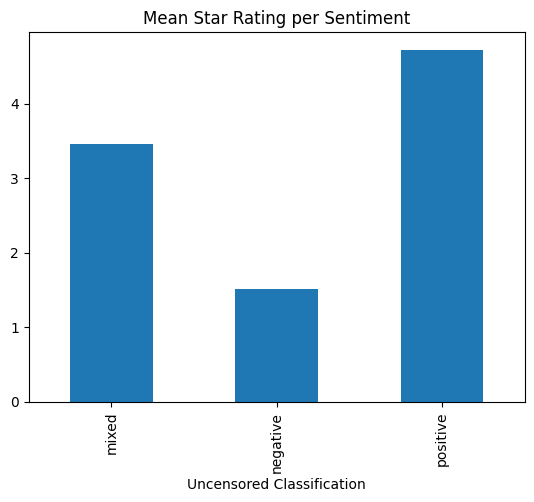

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.bar(data = yelp_review_dataset_sample, x = "Uncensored Classification", height = "stars")
yelp_review_dataset_sample.groupby("Uncensored Classification")["stars"].mean().plot.bar()

plt.title("Mean Star Rating per Sentiment");

In [29]:
print(f"Positive Count: {uncensored_yelp_review_classifications.count('positive')}")
print(f"Negative Count: {uncensored_yelp_review_classifications.count('negative')}")
print(f"Neutral Count: {uncensored_yelp_review_classifications.count('neutral')}")
print(f"Mixed Count: {uncensored_yelp_review_classifications.count('mixed')}")

Positive Count: 314
Negative Count: 82
Neutral Count: 0
Mixed Count: 104


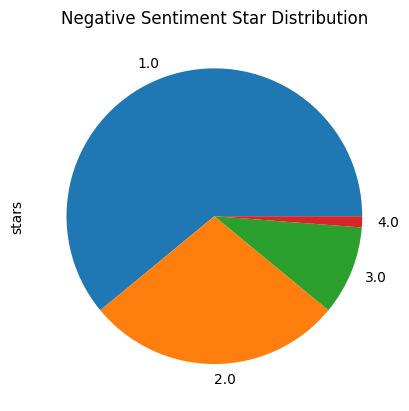

In [46]:
yelp_review_dataset_sample[yelp_review_dataset_sample["Uncensored Classification"] == "negative"].groupby("stars")["stars"].count().plot.pie()
plt.title("Negative Sentiment Star Distribution");

Gemini did not classify any 'neutral' reviews


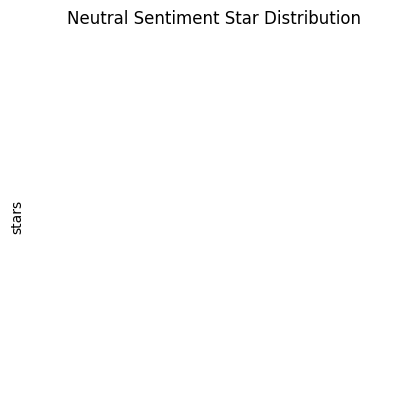

In [43]:
yelp_review_dataset_sample[yelp_review_dataset_sample["Uncensored Classification"] == "neutral"].groupby("stars")["stars"].count().plot.pie()
plt.title("Neutral Sentiment Star Distribution");
print("Gemini did not classify any 'neutral' reviews")

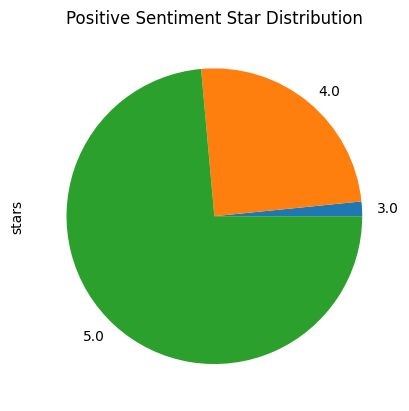

In [44]:
yelp_review_dataset_sample[yelp_review_dataset_sample["Uncensored Classification"] == "positive"].groupby("stars")["stars"].count().plot.pie()
plt.title("Positive Sentiment Star Distribution");

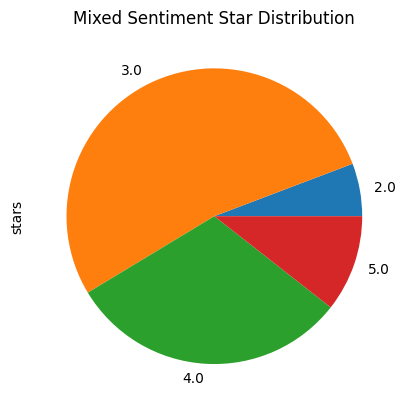

In [45]:
yelp_review_dataset_sample[yelp_review_dataset_sample["Uncensored Classification"] == "mixed"].groupby("stars")["stars"].count().plot.pie()
plt.title("Mixed Sentiment Star Distribution");

Text(0.5, 1.0, 'Uncensored Sentiment Distribution')

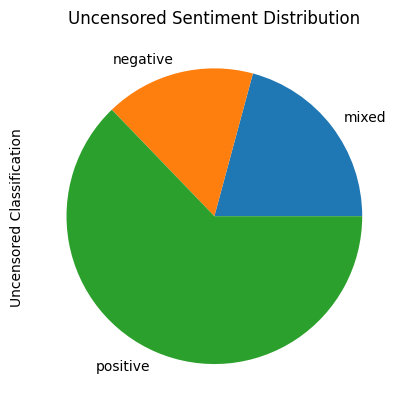

In [34]:
yelp_review_dataset_sample.groupby("Uncensored Classification")["Uncensored Classification"].count().plot.pie()
plt.title("Uncensored Sentiment Distribution")

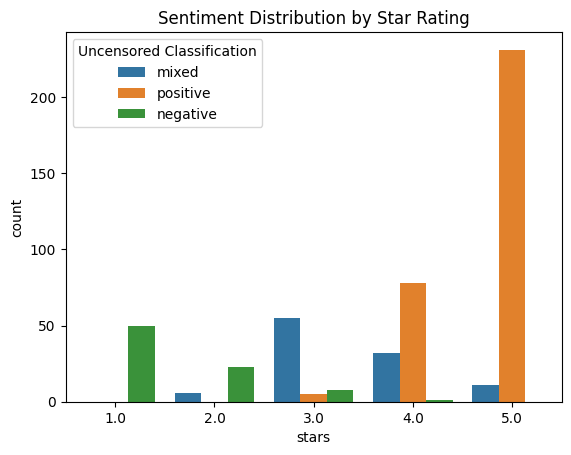

In [48]:
sns.countplot(data = yelp_review_dataset_sample, x = "stars", hue = "Uncensored Classification")
plt.title("Sentiment Distribution by Star Rating");

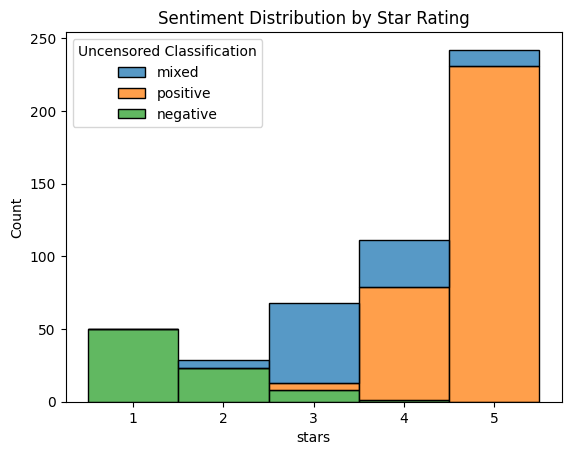

In [49]:
sns.histplot(data = yelp_review_dataset_sample, x = "stars", hue = "Uncensored Classification", multiple = "stack", discrete = True)
plt.title("Sentiment Distribution by Star Rating");